***Andrew Plum***<br/>
***CS 474***<br/>
***11/30/2024***

## Skin Cancer Detection¶
#### Project description
Skin cancer is the most common form of cancer, globally accounting for at least 40% of cancer cases. People with lighter skin are at higher risk. There are three main types of skin cancers: basal-cell skin cancer (BCC), squamous-cell skin cancer (SCC), and melanoma. Globally in 2012, melanoma occurred in 232,000 people and resulted in 55,000 deaths. Between 20% and 30% of melanomas develop from moles.

#### Task
In this project, we will develop deep learning-based solutions to classify images of skin moles into benign or malignant categories.

#### Data
The training and test set contains 2,637 and 660 images, respectively. The dataset is from a Kaggle Competition at https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign. The 'data' folder structure is as below

- data
    - train
        - benign
        - malignant
    - test
        - benign
        - malignant

#### Code templates
- If you have a computer with a large-size RAM (>8GB) and a fast CPU, you can download the data(zip file) to work on your own computer. You need to manually unzip the data file.
 - If you would like to use google colab, you can download the 'colab' template, and upload the code file and data zip file to your Google Drive; then open and edit the code using the Google Colab. The 3rd code cell will unzip the data file automatically.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip the image set. You only need to run this cell once.
#you may need to change the folders bellow
!unzip '/content/drive/MyDrive/Colab Notebooks/data.zip' -d '/content/drive/MyDrive/Colab Notebooks/'
print('unziped the image set to /content/drive/MyDrive/Colab Notebooks/')

Archive:  /content/drive/MyDrive/Colab Notebooks/data.zip
replace /content/drive/MyDrive/Colab Notebooks/data/test/benign/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: unziped the image set to /content/drive/MyDrive/Colab Notebooks/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1. Data preparation

**Note:**
- File paths may need to be changed to execute code fine.

In [ ]:
import os
from PIL import Image

#1.1 get image lists
# MIGHT NEED TO CHANGE THESE FILE PATHS TO RUN THE NOTEBOOK
train_b = '/content/drive/MyDrive/Classes/CS 474/Final Project/data/train/benign'
train_m = '/content/drive/MyDrive/Classes/CS 474/Final Project/data/train/malignant'

test_b = '/content/drive/MyDrive/Classes/CS 474/Final Project/data/test/benign'
test_m = '/content/drive/MyDrive/Classes/CS 474/Final Project/data/test/malignant'

def getImList(folder):
    # get the list of file names in 'folder'
    imList = os.listdir(folder) # get all names
    fPath = [os.path.join(folder, fName) for fName in imList] # add path to names

    return fPath

trainList_b = getImList(train_b)
trainList_m = getImList(train_m)
trainList = trainList_b + trainList_m
print("# training images:", len(trainList))

testList_b = getImList(test_b)
testList_m = getImList(test_m)
testList = testList_b + testList_m
print("# test images:", len(testList))

#1.2 load all images
read = lambda imName: np.asarray(Image.open(imName).convert("RGB"))
print('loading images ...')
X_train = [read(name) for name in trainList]
X_train = np.array(X_train, dtype='uint8')/255
print('.   training set shape:', X_train.shape)

X_test = [read(name) for name in testList]
X_test = np.array(X_test, dtype='uint8')/255
print('.   test set shape:', X_test.shape)

print('loading ended.')

# 1.3 Create target labels
y_benign_train = np.zeros(len(trainList_b))
y_malignant_train = np.ones(len(trainList_m))
y_train = np.concatenate((y_benign_train, y_malignant_train), axis = 0)
print('.    training target shape: ', y_train.shape)
y_benign_test = np.zeros(len(testList_b))
y_malignant_test = np.ones(len(testList_m))
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)
print('.    test target shape', y_test.shape)

# 1.4 Shuffle data
print('shuffling data ...')
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

print('Dataset is ready for using.')

# training images: 2638
# test images: 660
loading images ...
.   training set shape: (2638, 224, 224, 3)
.   test set shape: (660, 224, 224, 3)
loading ended.
.    training target shape:  (2638,)
.    test target shape (660,)
shuffling data ...
Dataset is ready for using.


### Create Validation Set From Training Set
- I will be splitting the dataset into:
  - 60% training data
  - 20% validation data
  - 20% test data

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state = 0)

print('Training set shape:', X_train.shape)
print('Training target shape: ', y_train.shape)

print('Validation set shape:', X_validation.shape)
print('Validation target shape: ', y_validation.shape)

print('Test set shape:', X_test.shape)
print('Test target shape', y_test.shape)

total_images = X_train.shape[0] + X_validation.shape[0] + X_test.shape[0]
print("\nTotal Images:\n", total_images)

Training set shape: (1978, 224, 224, 3)
Training target shape:  (1978,)
Validation set shape: (660, 224, 224, 3)
Validation target shape:  (660,)
Test set shape: (660, 224, 224, 3)
Test target shape (660,)

Total Images:
 3298


### Familiarizing Myself With the Data

### Build Model

In [ ]:
CNN_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

CNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       5,537,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,594,177 (21.34 MB)

 Trainable params: 5,594,177 (21.34 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('best_model.keras',
                             save_best_only = True,
                             save_weights_only = False,
                             monitor = "val_accuracy",
                             mode = "max",
                             verbose = 1)

CNN_model_hist = CNN_model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_data = (X_validation, y_validation), callbacks = [checkpoint])

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5726 - loss: 0.8048
Epoch 1: val_accuracy improved from -inf to 0.54545, saving model to best_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.5728 - loss: 0.8031 - val_accuracy: 0.5455 - val_loss: 0.6076
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6127 - loss: 0.5687
Epoch 2: val_accuracy improved from 0.54545 to 0.74697, saving model to best_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.6138 - loss: 0.5684 - val_accuracy: 0.7470 - val_loss: 0.5002
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7614 - loss: 0.4956
Epoch 3: val_accuracy improved from 0.74697 to 0.76818, saving model to best_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.7615 - loss: 0.4953 - val_accuracy: 0.7682 - val_loss: 0.5374
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7876 - loss: 0.4096
Epoch 4: val_accuracy improved from 0.76818 to 0.80303, 

### Evaluate Model Performance

In [ ]:
y_train_hat = CNN_model.predict(X_train)
y_train_hat = (0.5 < y_train_hat).astype(int)

y_test_hat = CNN_model.predict(X_test)
y_test_hat = (0.5 < y_test_hat).astype(int)

y_train_hat = y_train_hat.flatten()
y_test_hat = y_test_hat.flatten()

train_accuracy = accuracy_score(y_train, y_train_hat)
test_accuracy = accuracy_score(y_test, y_test_hat)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print()

train_accuracy = (sum(y_train == y_train_hat) / y_train_hat.shape[0])
test_accuracy = (sum(y_test == y_test_hat) / y_test_hat.shape[0])

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print()

62/62 ━━━━━━━━━━━━━━━━━━━━ 62s 992ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 906ms/step
Train accuracy: 0.8124368048533872
Test accuracy: 0.793939393939394

Train accuracy: 0.8124368048533872
Test accuracy: 0.793939393939394



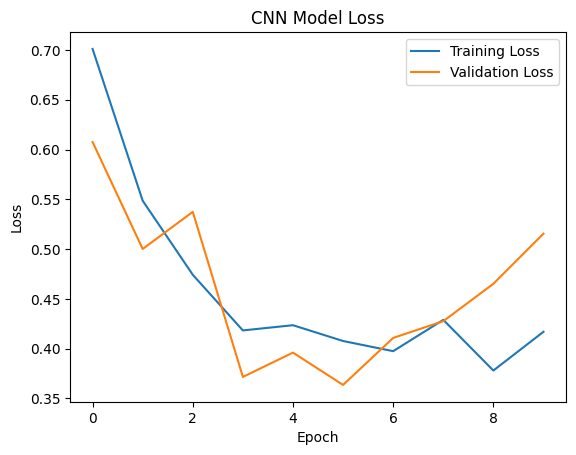

In [ ]:
plt.plot(CNN_model_hist.history['loss'], label = 'Training Loss')
plt.plot(CNN_model_hist.history['val_loss'], label = 'Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Compare to Pre-built Models

Predict using VGG16 model

In [ ]:
#VGG16_model = VGG16(weights = "imagenet", include_top=False)
VGG16_model = keras.applications.VGG16(weights = "imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in VGG16_model.layers:
    layer.trainable = False

x = keras.layers.GlobalAveragePooling2D()(VGG16_model.output)
x = keras.layers.Dense(256, activation='relu')(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)

VGG16_transfer_model = keras.Model(inputs = VGG16_model.input, outputs=output)

VGG16_transfer_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

VGG16_transfer_model_hist = VGG16_transfer_model.fit(
    X_train, y_train,
    epochs = 5,
    verbose = 1,
    validation_data = (X_validation, y_validation),
    callbacks = [checkpoint]
)


Epoch 1/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.6929 - loss: 0.5930 
Epoch 1: val_accuracy improved from 0.81212 to 0.82121, saving model to best_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 1722s 28s/step - accuracy: 0.6937 - loss: 0.5921 - val_accuracy: 0.8212 - val_loss: 0.4416
Epoch 2/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.8092 - loss: 0.4492 
Epoch 2: val_accuracy improved from 0.82121 to 0.83485, saving model to best_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 1674s 27s/step - accuracy: 0.8089 - loss: 0.4493 - val_accuracy: 0.8348 - val_loss: 0.4234
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.8063 - loss: 0.4315 
Epoch 3: val_accuracy did not improve from 0.83485
62/62 ━━━━━━━━━━━━━━━━━━━━ 1721s 27s/step - accuracy: 0.8063 - loss: 0.4314 - val_accuracy: 0.8318 - val_loss: 0.3928
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.8102 - loss: 0.4125 
Epoch 4: val_accuracy did not improve from 0.83485
62/62 ━━━━━━━━━━━━━━━━━━━━ 169

In [ ]:
y_train_hat = VGG16_transfer_model.predict(X_train)
y_train_hat = (0.5 < y_train_hat).astype(int)

y_test_hat = VGG16_transfer_model.predict(X_test)
y_test_hat = (0.5 < y_test_hat).astype(int)

y_train_hat = y_train_hat.flatten()
y_test_hat = y_test_hat.flatten()

train_accuracy = accuracy_score(y_train, y_train_hat)
test_accuracy = accuracy_score(y_test, y_test_hat)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print()

train_accuracy = (sum(y_train == y_train_hat) / y_train_hat.shape[0])
test_accuracy = (sum(y_test == y_test_hat) / y_test_hat.shape[0])

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print()

62/62 ━━━━━━━━━━━━━━━━━━━━ 1273s 20s/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 424s 20s/step
Train accuracy: 0.8296258847320526
Test accuracy: 0.8363636363636363

Train accuracy: 0.8296258847320526
Test accuracy: 0.8363636363636363



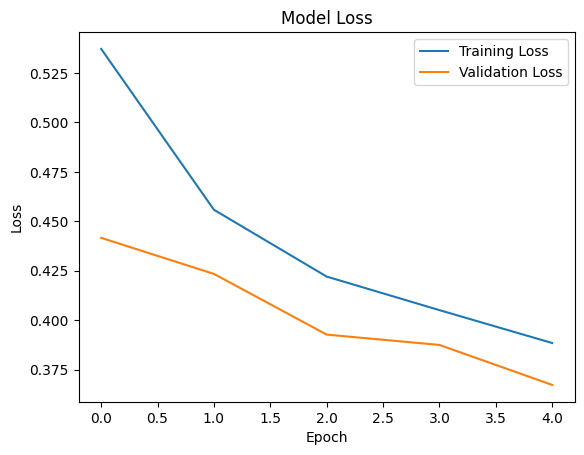

In [ ]:
plt.plot(VGG16_transfer_model_hist.history['loss'], label = 'Training Loss')
plt.plot(VGG16_transfer_model_hist.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
VGG16_transfer_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 15,109,445 (57.64 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 263,172 (1.00 MB)